# Predict Heart Disease with Machine Learning <a id='top'></a>
Welcome to this notebook! This notebook will build a classification model that can predict whether a person have heart disease or not given their medical status.

**Note:** The dataset used to build this model is collected from [this Kaggle dataset](https://www.kaggle.com/cherngs/heart-disease-cleveland-uci). This data has been re-processed, and contains 14 columns (including the predicted target).

The discriptions of each column are as follows:
1. age: age in years
2. sex (1 = male; 0 = female)
3. cp - chest pain type (4 values)
    * Value 0: typical angina
    * Value 1: atypical angina
    * Value 2: non-anginal pain
    * Value 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol - serum cholestoral in mg/dl
6. fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7. restecg - resting electrocardiographic results (values 0,1,2)
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
11. slope - the slope of the peak exercise ST segment
    * Value 0: upsloping
    * Value 1: flat
    * Value 2: downsloping
12. ca - number of major vessels (0-3) colored by flourosopy
13. thal - 0 = normal; 1 = fixed defect; 2 = reversable defectage
14. target - have heart disease or not (1 = no, 0 = yes)

**Table of contents:**
* [Data exploration](#data-exploration)
* [Data visualization](#visualization)
* [Preprocessing data for modelling](#preprocess-data)
* [Modelling](#modelling)
* [Tuning KNN classifier](#tuning-knn)
* [Tuning logistic regression](#tuning-log-reg)
* [Tuning random forest classifier](#tuning-rfclassifier)
* [Save the model](#save-model)
* [Predict a single patient](#predict-single)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier



# for model improvement
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import joblib

## Data Collection and Processing

In [ ]:
# loading data into pandas data frame

heart_data_1 = pd.read_csv("/content/heart_dataset_RafaelGranza_1026.csv")
heart_data_1.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [ ]:
heart_data_2 = pd.read_csv("/content/heart_dataset_bharath0609_304.csv")
heart_data_2.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
heart_data_3 = pd.read_csv("/content/heart_dataset_jocelyndumlao_1000.csv")
heart_data_3.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,53,1,2,171,0,0,1,147,0,5.3,3,2,3,1
1,40,1,0,94,229,0,1,115,0,3.7,1,0,1,0
2,49,1,2,133,142,0,0,202,1,5.0,1,0,0,0
3,43,1,0,138,295,1,1,153,0,3.2,2,1,2,1
4,31,1,1,199,0,0,2,136,0,5.3,3,3,2,1
5,24,1,1,173,0,0,0,161,0,4.7,3,0,2,1
6,79,1,2,130,240,0,2,157,0,2.5,2,3,1,1
7,52,1,0,127,345,0,0,192,1,4.9,1,1,0,0
8,62,1,0,121,357,0,1,138,0,2.8,0,0,0,0
9,61,0,0,190,181,0,1,150,0,2.9,2,2,0,1


In [ ]:
heart_data_4 = pd.read_csv("/content/heart_dataset_rishidamarla_271.csv")
heart_data_4.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,Presence
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,Presence
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,Presence
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,Presence


In [ ]:
heart_data_4['target'] = heart_data_4['target'].map({'Presence': 1, 'Absence': 0})
heart_data_4.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,0
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,1
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,1
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,1
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,1


In [ ]:
heart_data_1.shape

(1025, 14)

In [ ]:
heart_data_2.shape

(303, 14)

In [ ]:
heart_data_3.shape

(1000, 14)

In [ ]:
heart_data_4.shape

(270, 14)

In [ ]:
heart_data = pd.concat([heart_data_1, heart_data_2, heart_data_3, heart_data_4])
heart_data.shape

(2598, 14)

In [ ]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
heart_data.shape

(2598, 14)

In [ ]:
#columns names

heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
# describing data

heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,2598.000000,2598.000000,2598.000000,2598.000000,2598.000000,2598.000000,2598.000000,2598.000000,2598.000000,2598.000000,2598.000000,2598.000000,2598.000000,2598.000000
mean,52.427637,0.719015,1.191686,139.335643,271.602386,0.205543,0.664742,147.834873,0.396844,1.695343,1.467283,0.742109,2.145112,0.535412
std,13.407535,0.449567,1.200459,25.132558,96.857473,0.404175,0.706151,27.901321,0.489337,1.617951,0.792417,1.020999,1.404966,0.498840
min,20.000000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,0.000000,0.000000,122.000000,213.000000,0.000000,0.000000,130.000000,0.000000,0.200000,1.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,1.000000,134.000000,255.500000,0.000000,1.000000,151.000000,0.000000,1.300000,1.000000,0.000000,2.000000,1.000000
75%,62.000000,1.000000,2.000000,151.000000,315.000000,0.000000,1.000000,169.000000,1.000000,2.600000,2.000000,1.000000,3.000000,1.000000
max,80.000000,1.000000,4.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,7.000000,1.000000


In [ ]:
# dataset information

heart_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2598 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2598 non-null   int64  
 1   sex       2598 non-null   int64  
 2   cp        2598 non-null   int64  
 3   trestbps  2598 non-null   int64  
 4   chol      2598 non-null   int64  
 5   fbs       2598 non-null   int64  
 6   restecg   2598 non-null   int64  
 7   thalach   2598 non-null   int64  
 8   exang     2598 non-null   int64  
 9   oldpeak   2598 non-null   float64
 10  slope     2598 non-null   int64  
 11  ca        2598 non-null   int64  
 12  thal      2598 non-null   int64  
 13  target    2598 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 304.5 KB


In [ ]:
# checking for missing values

heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# checking the distribution of target variable

heart_data['target'].value_counts()

1    1391
0    1207
Name: target, dtype: int64

## Data Visualization

<Axes: xlabel='target', ylabel='count'>

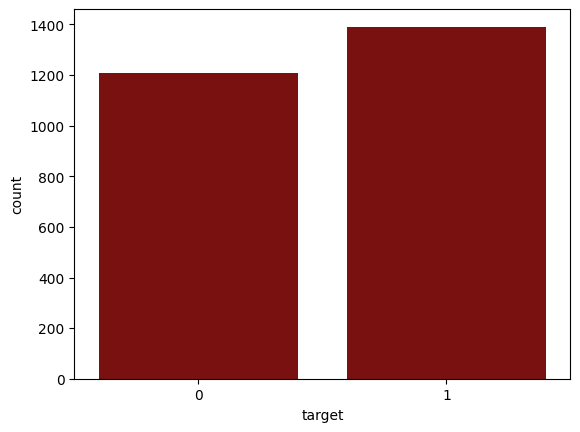

In [ ]:
sns.countplot(x=heart_data["target"], color = 'darkred')

# distribution of target

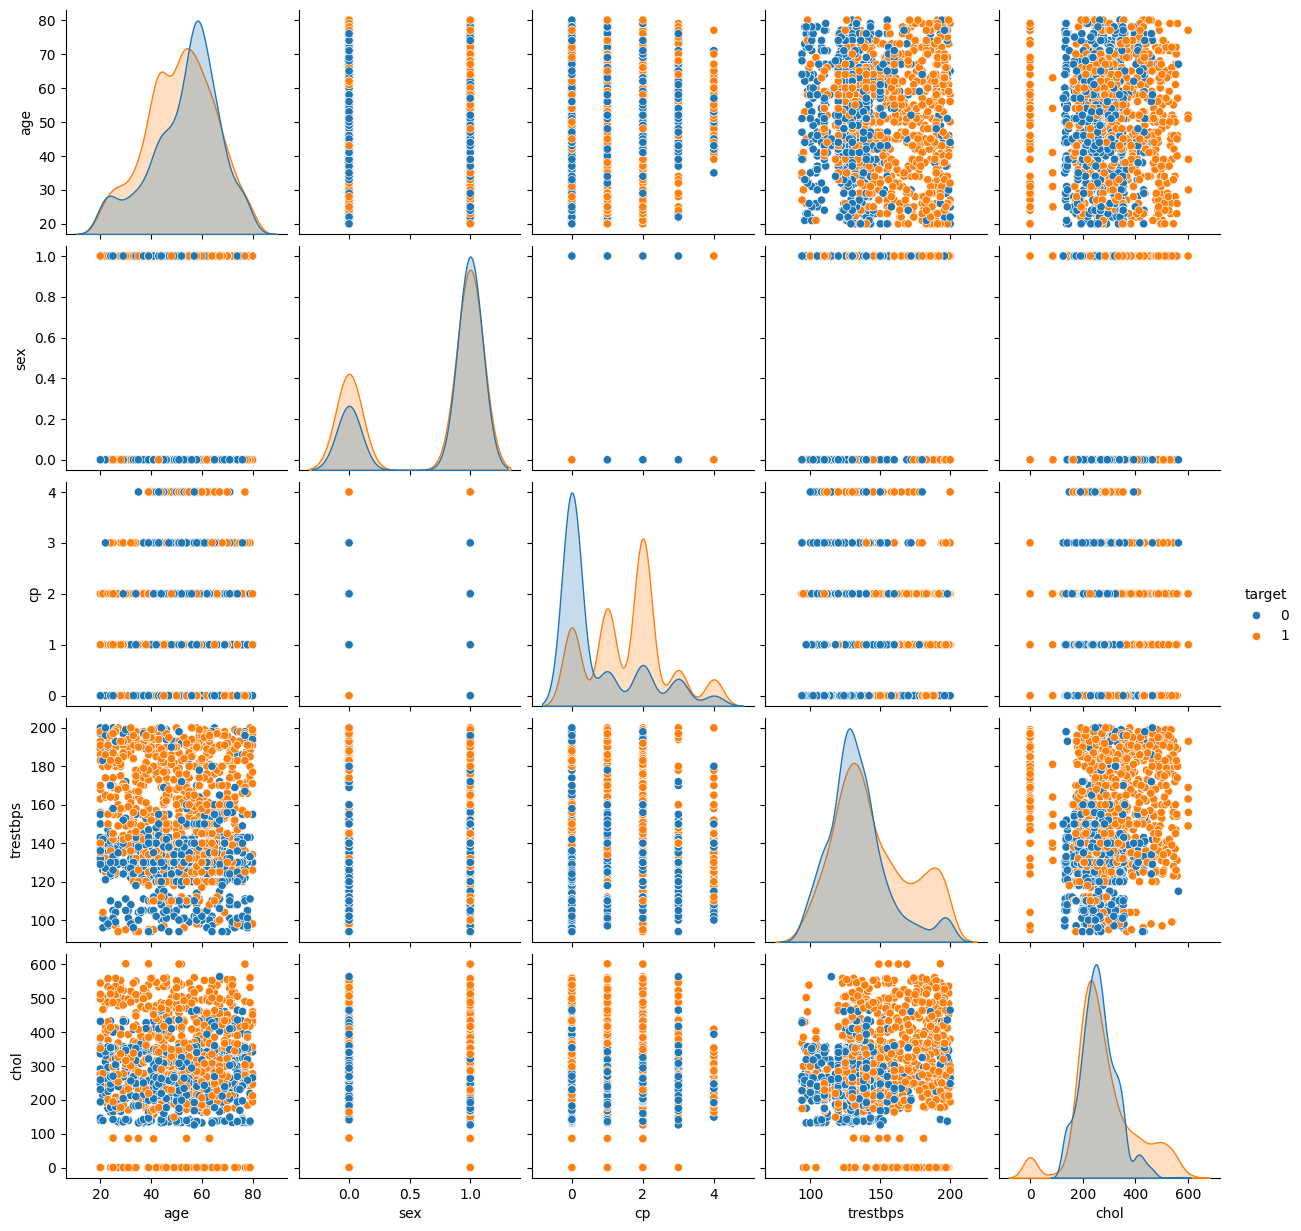

In [ ]:
sns.pairplot(heart_data, hue= 'target',vars = ['age', 'sex', 'cp', 'trestbps', 'chol' ])

# pair plot in dataset of outcome with all columns

<Axes: >

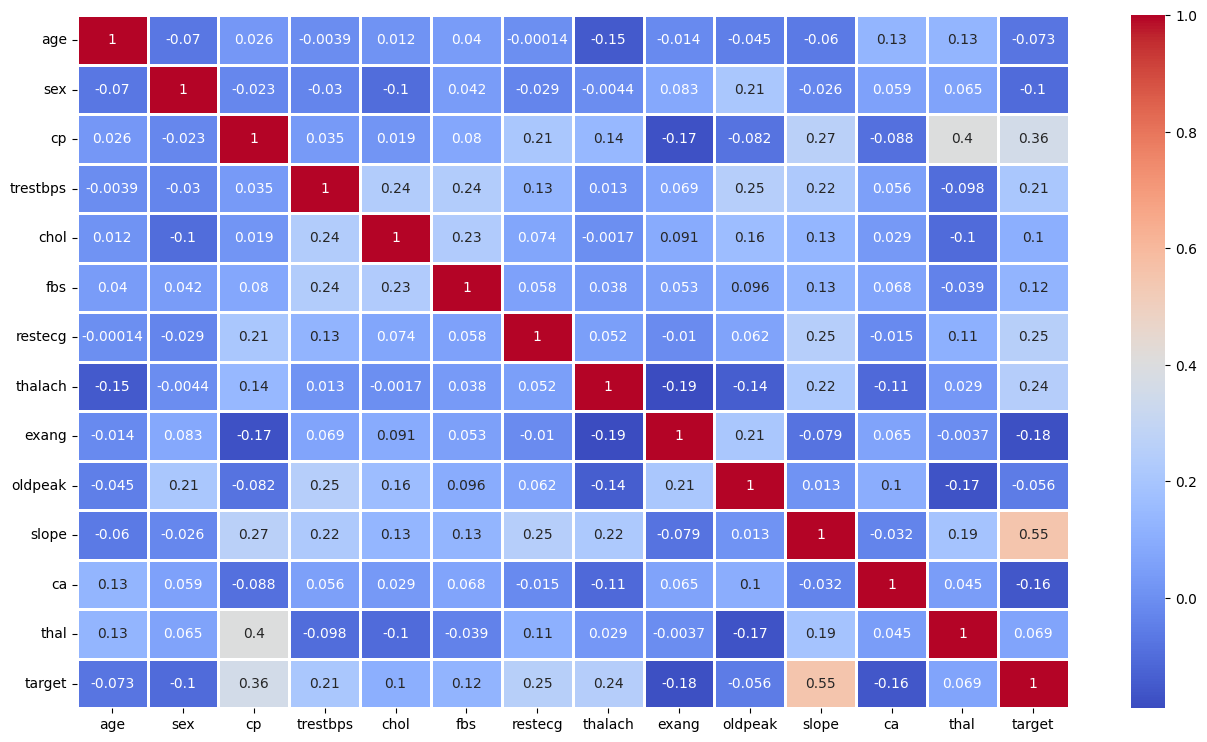

In [ ]:
#create correlation chart for all columns

plt.figure(figsize= (16,9))
sns.heatmap(heart_data.corr(), annot = True, cmap='coolwarm', linewidths = 2)

here, we have approx equal distribution of data.

### Notation for Healthy and Defective Heart

- 1 Represents a Defective Heart
- 0 Represents a Healthy Heart


## Splitting the Features and Target

In [ ]:
X = heart_data.drop(columns = 'target', axis = 1)
X.head()

# now X contains table without target column which will help for training the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [ ]:
Y = heart_data['target']
Y.head()

# Y contains one column which includes output for validating the result after model prediction


0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

### Data Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)
X_standard = scaler.transform(X)


## Splitting the Data into Training data and Test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, stratify = Y, random_state = 3 )

# stratify will distribute 0 and 1 in even manner, of that prediction will be unbiased
# test_split tells a ratio about size of test data in dataset, means 15 percent of data is test data
# random_state tells about the randomness of data, and number tells about its extent of randomness



In [ ]:
# checking shape of splitted data

print(X.shape, X_train.shape, X_test.shape)

(2598, 13) (2208, 13) (390, 13)


## Model Training


### 1. Logistic Regression



In [ ]:
# instantiate the model
lr = LogisticRegression()

# training the LogisticRegression model with training data
lr.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
print('Model Precision score: {0:0.4f}'. format(precision_score(Y_test, y_pred)))


Model accuracy score: 0.8026
Model Precision score: 0.7973


### 2. Naive Bayes Classifier

In [ ]:
# instantiate the model
gnb = GaussianNB()
# model = gnb

# fit the model
gnb.fit(X_train, Y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test)

y_pred
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
print('Model Precision score: {0:0.4f}'. format(precision_score(Y_test, y_pred)))


Model accuracy score: 0.8154
Model Precision score: 0.8374


### 3. K-Nearest Neighbor (KNN)

In [ ]:
# instantiate the model
knn = KNeighborsClassifier(n_neighbors=7)


# fit the model
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred = knn.predict(X_test)

y_pred
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
print('Model Precision score: {0:0.4f}'. format(precision_score(Y_test, y_pred)))

Model accuracy score: 0.6487
Model Precision score: 0.6593


### 4. Decision Tree Classifier

In [ ]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier()


# fit the model
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dtc.predict(X_test)

y_pred
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
print('Model Precision score: {0:0.4f}'. format(precision_score(Y_test, y_pred)))



Model accuracy score: 0.9308
Model Precision score: 0.9461


### 5. Support Vector Machine (Linear)

In [ ]:
# instantiate the model
svm = SVC(kernel='linear')

# fitting x samples and y classes
svm.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svm.predict(X_test)

y_pred
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
print('Model Precision score: {0:0.4f}'. format(precision_score(Y_test, y_pred)))

Model accuracy score: 0.8077
Model Precision score: 0.8221


## Multi-model training

In [ ]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0) # A higher gamma value means that each training example will have a greater influence on the decision boundary.
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1') # liblinear is parameter specifies the solver to use,
# L1 penalty is a type of regularization that helps to prevent overfitting.

rfc = RandomForestClassifier(n_estimators= 50, random_state = 2)  # n_estimators : the number of trees in the forest,
# random_state : specifies the random seed that is used to initialize the random forest

abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state=2)

In [ ]:
classification = {
    'Support Vector Classifier' : svc,
    'K-Neighbors Classifier'  : knc,
    'Multinomial NB'  : mnb,
    'Decision Tree Classifier'  : dtc,
    'Logistic Regression'  : lrc,
    'Random Forest Classifier'  : rfc,
    'AdaBoost Classifier': abc,
    'Bagging Classifier' : bc,
    'Extra Trees Classifier' : etc,
    'Gradient Boosting Classifier' : gbdt,
    'XGB Classifier' : xgb
}

In [ ]:
def train_classifier(classification, X_train, y_train, X_test, y_test):
  classification.fit(X_train, y_train)
  y_pred = classification.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  matrix = confusion_matrix(y_test, y_pred)

  return accuracy, precision, matrix

In [ ]:
accuracy_scores = []
precision_scores = []

for name, cls in classification.items():
  curr_accuracy, curr_precision, matrix = train_classifier(cls, X_train, Y_train, X_test, Y_test)
  print("Model name : ", name)
  print("Accuracy : ", curr_accuracy)
  print("Precision : ", curr_precision)
  print("Confusin-Matrix : ", matrix, '\n')

  accuracy_scores.append(curr_accuracy)
  precision_scores.append(curr_precision)



Model name :  Support Vector Classifier
Accuracy :  0.5358974358974359
Precision :  0.5358974358974359
Confusin-Matrix :  [[  0 181]
 [  0 209]] 

Model name :  K-Neighbors Classifier
Accuracy :  0.7589743589743589
Precision :  0.7555555555555555
Confusin-Matrix :  [[126  55]
 [ 39 170]] 

Model name :  Multinomial NB
Accuracy :  0.7051282051282052
Precision :  0.7025862068965517
Confusin-Matrix :  [[112  69]
 [ 46 163]] 

Model name :  Decision Tree Classifier
Accuracy :  0.8538461538461538
Precision :  0.88
Confusin-Matrix :  [[157  24]
 [ 33 176]] 

Model name :  Logistic Regression
Accuracy :  0.8128205128205128
Precision :  0.8238095238095238
Confusin-Matrix :  [[144  37]
 [ 36 173]] 

Model name :  Random Forest Classifier
Accuracy :  0.9564102564102565
Precision :  0.9660194174757282
Confusin-Matrix :  [[174   7]
 [ 10 199]] 

Model name :  AdaBoost Classifier
Accuracy :  0.8512820512820513
Precision :  0.8793969849246231
Confusin-Matrix :  [[157  24]
 [ 34 175]] 

Model name : 

In [ ]:
result_dataframe = pd.DataFrame({'Algorithm': classification.keys(), 'Accuracy': accuracy_scores, 'Precision' : precision_scores}).sort_values('Precision', ascending = False)

In [ ]:
result_dataframe

,Algorithm,Accuracy,Precision
10,XGB Classifier,0.971795,0.966981
7,Bagging Classifier,0.961538,0.966346
5,Random Forest Classifier,0.956410,0.966019
8,Extra Trees Classifier,0.966667,0.953704
9,Gradient Boosting Classifier,0.882051,0.893720
3,Decision Tree Classifier,0.853846,0.880000
6,AdaBoost Classifier,0.851282,0.879397
4,Logistic Regression,0.812821,0.823810
1,K-Neighbors Classifier,0.758974,0.755556
2,Multinomial NB,0.705128,0.702586


## Model Improvement

In [ ]:
# voting classifier :  ensemble learning method that combines the predictions of several different machine learning models to produce a final prediction.
# The models that are combined can be of different types, such as decision trees, support vector machines, or random forests.

xgb = XGBClassifier(n_estimators = 50, random_state=2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
rfc = RandomForestClassifier(n_estimators= 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)

In [ ]:
voting = VotingClassifier(estimators=[('xgb', xgb), ('bc', bc), ('rfc', rfc),  ('et', etc) ],voting='soft')

In [ ]:
voting.fit(X_train, Y_train)

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_ra...
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=2, ...)),
                             ('bc',
                              BaggingClassifier(n_estimators=50,
                                                random_state=2)),
                             ('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
# comparision between voting classifiers and XGBClassifier

y_pred = voting.predict(X_test)


print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
print('Model precision score: {0:0.4f}'. format(precision_score(Y_test, y_pred)))
print('Model confusion_matrix: ', (confusion_matrix(Y_test, y_pred)))

# print(accuracy_score(Y_test, y_pred))
# print(confusion_matrix(Y_test, y_pred))
# print(precision_score(Y_test, y_pred))

# voting model is most accurate and precise

rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_test)

# print(accuracy_score(Y_test, y_pred))
# print(confusion_matrix(Y_test, y_pred))
# print(precision_score(Y_test, y_pred))



print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
print('Model precision score: {0:0.4f}'. format(precision_score(Y_test, y_pred)))
print('Model confusion_matrix: ', (confusion_matrix(Y_test, y_pred)))

Model accuracy score: 0.9718
Model precision score: 0.9670
Model confusion_matrix:  [[174   7]
 [  4 205]]
Model accuracy score: 0.9564
Model precision score: 0.9660
Model confusion_matrix:  [[174   7]
 [ 10 199]]


## Model Evaluation

- Accuracy score
  - 1. For training data
  - 2. For testing data

  accuracy score for both should be closer to 1

- Other Metrices:
  - 1. Accuracy
  - 2. Precision
  - 3. Recall
  - 4. F1 Score

- Confusion Metrix
  

In [ ]:
# accuracy of traning data
# accuracy function measures accuracy between two values,or columns

X_train_prediction = rfc.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print("The accuracy of training data : ", training_data_accuracy)


The accuracy of training data :  1.0


In [ ]:
# accuracy of traning data
# accuracy function measures accuracy between two values,or columns

X_train_prediction = rfc.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print("The accuracy of training data : ", training_data_accuracy)


The accuracy of training data :  1.0


In [ ]:
# Accuracy, F1, Recall, Precision

Y_pred = rfc.predict(X_test)


accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(Y_test, Y_pred)
print("Precision  :", precision)
recall = recall_score(Y_test, Y_pred)
print("Recall     :", recall)
F1_score = f1_score(Y_test, Y_pred)
print("F1-score   :", F1_score)

Accuracy   : 0.9564102564102565
Precision  : 0.9660194174757282
Recall     : 0.9521531100478469
F1-score   : 0.9590361445783133


In [ ]:
# check results
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       181
           1       0.97      0.95      0.96       209

    accuracy                           0.96       390
   macro avg       0.96      0.96      0.96       390
weighted avg       0.96      0.96      0.96       390



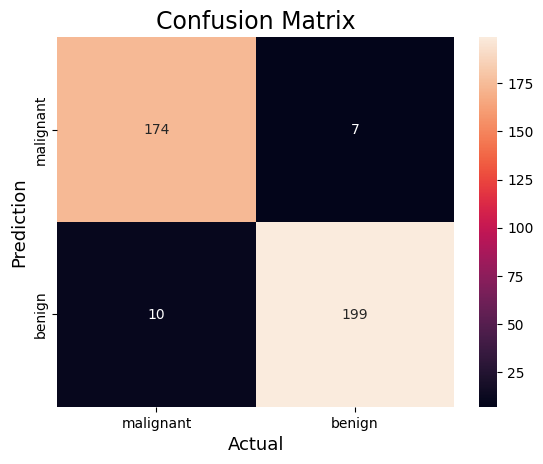

In [ ]:
# confusion matrix

cm = confusion_matrix(Y_test,Y_pred)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['malignant', 'benign'],
            yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

## Building Prediction system

#### Steps :

  - take input data
  - Process the data, change into array
  - reshape data as single element in array
  - predict output using predict function
  - output the value

In [ ]:
# input feature values
input_data = (58,0,3,150,283,1,0,162,0,1,2,0,2)

# changing data to numpy array
input_data_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped =  input_data_array.reshape(1,-1)

# standarize the input data
# std_data = scaler.transform(input_data_reshaped)
# print(std_data[0])


In [ ]:
# predicting the result and printing it

prediction = rfc.predict(input_data_reshaped)

print(prediction)

if(prediction[0] == 0):
    print("Patient has a healthy heart 💛💛💛💛")

else:
    print("Patient has a heart Disease 💔💔💔💔")

[1]
Patient has a heart Disease 💔💔💔💔


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### Notations
  - [0] : means patient has a healthy heart 💛💛💛💛
  - [1] : means patient has a unhealthy heart 💔💔💔💔
  

## Saving the model

In [ ]:
import pickle
# importing the library

filename = "trained_model.pkl"
pickle.dump(rfc, open(filename, 'wb'))
# saving file


In [ ]:
# loading the saved model

loaded_model = pickle.load(open("trained_model.pkl",'rb'))

In [ ]:
# save the model to disk
filename = 'heart_model.sav'
joblib.dump(rfc, filename)

['heart_model.sav']